# Data Visualization of Forbes Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')

In [2]:
forbes = pd.read_csv(r"/Users/smallcase/Downloads/Forbes.csv")
forbes.head(2)

rank                      name        forbes_id  net_worth   age  \
0     1  Bernard Arnault & family  bernard-arnault      211.0  74.0   
1     2                 Elon Musk        elon-musk      180.0  51.0   

   age_range        country         source          industry   Age  ...  \
0          8         France           LVMH  Fashion & Retail  74.0  ...   
1          6  United States  Tesla, SpaceX        Automotive  52.0  ...   

       Residence    Citizenship  Marital Status Children  \
0  Paris, France         France         Married      5.0   
1  Austin, Texas  United States          Single     10.0   

                                           Education Bachelor  Master  \
0  Bachelor of Arts/Science, Ecole Polytechnique ...      1.0     0.0   
1  Bachelor of Arts/Science, University of Pennsy...      1.0     0.0   

  Doctorate  Drop Out  Self Made  
0       0.0       0.0          0  
1       0.0       0.0          1  

[2 rows x 23 columns]

In [3]:
forbes.shape

(2640, 23)

In [4]:
forbes.columns


Index(['rank', 'name', 'forbes_id', 'net_worth', 'age', 'age_range', 'country',
       'source', 'industry', 'Age', 'Source of Wealth', 'Self-Made Score',
       'Philanthropy Score', 'Residence', 'Citizenship', 'Marital Status',
       'Children', 'Education', 'Bachelor', 'Master', 'Doctorate', 'Drop Out',
       'Self Made'],
      dtype='object')

# Data Visualization on raw data

# Matplotlib

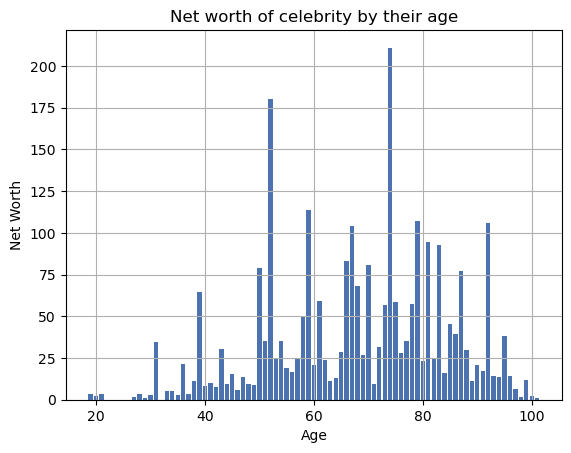

In [5]:
# BAR CHART

plt.bar(forbes.Age, forbes.net_worth,linewidth = 30)
plt.title('Net worth of celebrity by their age')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.grid()
plt.show()

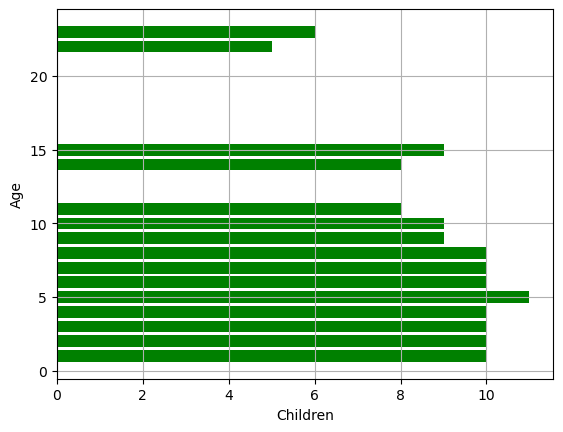

In [6]:
plt.style.use('fast')

plt.barh(forbes.Children, forbes.age_range, color = 'g')
plt.xlabel('Children')
plt.ylabel('Age')
plt.grid()

# Pie Chart

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
age = forbes['Age']
Self_made_score = forbes['Self-Made Score']
Philanthropy_score = forbes['Philanthropy Score']

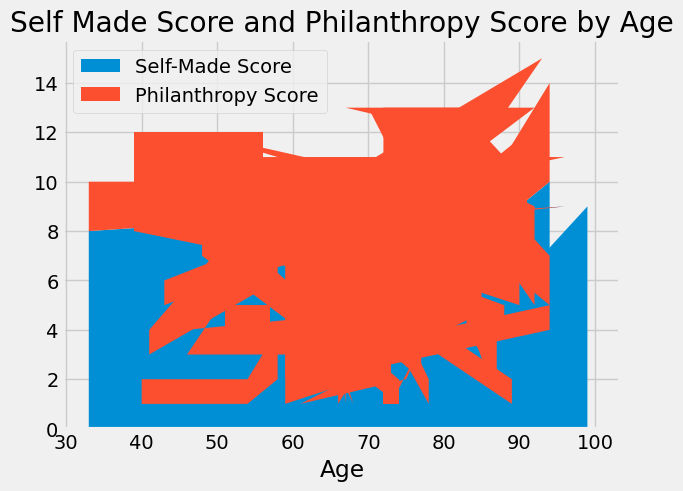

In [9]:
plt.stackplot(age, Self_made_score , Philanthropy_score, labels = ['Self-Made Score','Philanthropy Score'] )
plt.title('Self Made Score and Philanthropy Score by Age')
plt.xlabel('Age')
plt.legend(loc = 'upper left')
plt.show()

# Histograms

In [10]:
plt.style.use('seaborn-v0_8-pastel')

forbes.Age.median()

66.0

In [11]:
median_age = 66

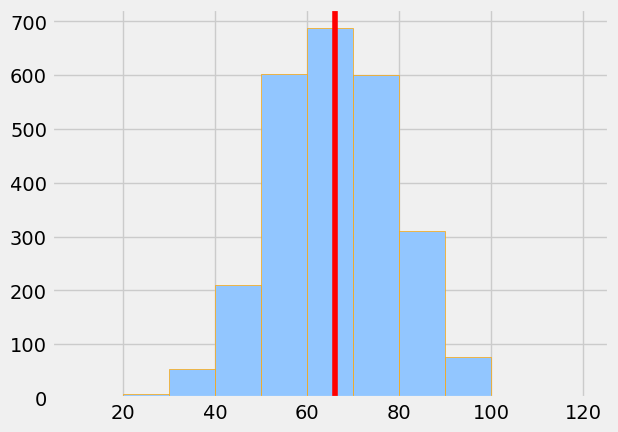

In [12]:
plt.hist(forbes.Age, bins = [10,20,30,40,50,60,70,80,90,100,110,120], edgecolor = 'orange')


plt.axvline(median_age, color = 'red', label = 'Age Median' )

plt.show()

# Scatter plots

In [13]:
plt.style.use('seaborn-v0_8-muted')

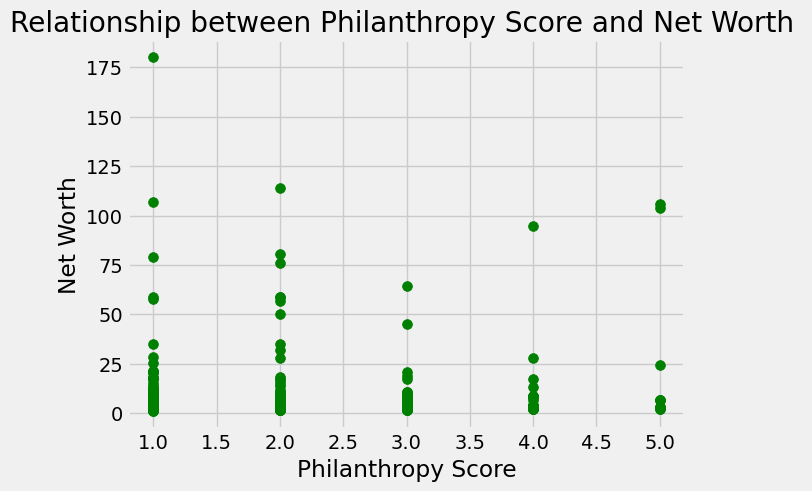

In [14]:
plt.scatter(forbes['Philanthropy Score'], forbes.net_worth, s= 50 , c = 'green')
plt.xlabel('Philanthropy Score')
plt.ylabel('Net Worth')
plt.title('Relationship between Philanthropy Score and Net Worth ')
plt.show()

In [15]:
forbes.dtypes

rank                    int64
name                   object
forbes_id              object
net_worth             float64
age                   float64
age_range               int64
country                object
source                 object
industry               object
Age                   float64
Source of Wealth       object
Self-Made Score       float64
Philanthropy Score    float64
Residence              object
Citizenship            object
Marital Status         object
Children              float64
Education              object
Bachelor              float64
Master                float64
Doctorate             float64
Drop Out              float64
Self Made               int64
dtype: object

In [16]:
forbes[['net_worth','age', 'age_range','Self-Made Score',
       'Philanthropy Score','Children']].describe()

net_worth          age    age_range  Self-Made Score  \
count  2640.000000  2575.000000  2640.000000       558.000000   
mean      4.623788    65.138641     6.782955         6.586022   
std       9.834241    13.258934     1.722357         2.644520   
min       1.000000    18.000000     0.000000         1.000000   
25%       1.500000    56.000000     6.000000         5.000000   
50%       2.300000    65.000000     7.000000         8.000000   
75%       4.200000    75.000000     8.000000         8.000000   
max     211.000000   101.000000    11.000000        10.000000   

       Philanthropy Score     Children  
count          411.000000  1598.000000  
mean             1.927007     2.969337  
std              1.021489     1.675171  
min              1.000000     1.000000  
25%              1.000000     2.000000  
50%              2.000000     3.000000  
75%              2.000000     4.000000  
max              5.000000    23.000000

In [17]:
# there are two age columns lets remove one column

forbes.drop('Age',axis=1, inplace=True)

In [18]:
forbes.isna().sum()

rank                     0
name                     0
forbes_id                0
net_worth                0
age                     65
age_range                0
country                  0
source                   0
industry                 0
Source of Wealth         1
Self-Made Score       2082
Philanthropy Score    2229
Residence               59
Citizenship             11
Marital Status         551
Children              1042
Education             1225
Bachelor              1224
Master                1224
Doctorate             1224
Drop Out              1224
Self Made                0
dtype: int64

# Imputation

In [19]:
forbe = forbes.ffill()

In [20]:
forbe.dropna(inplace = True)

In [21]:
forbe.isna().sum()

rank                  0
name                  0
forbes_id             0
net_worth             0
age                   0
age_range             0
country               0
source                0
industry              0
Source of Wealth      0
Self-Made Score       0
Philanthropy Score    0
Residence             0
Citizenship           0
Marital Status        0
Children              0
Education             0
Bachelor              0
Master                0
Doctorate             0
Drop Out              0
Self Made             0
dtype: int64

In [22]:
forbe.describe()

rank    net_worth          age    age_range  Self-Made Score  \
count  2639.000000  2639.000000  2639.000000  2639.000000      2639.000000   
mean   1289.647215     4.545585    65.033725     6.782493         6.838954   
std     739.408520     8.977617    13.254979     1.722521         2.560604   
min       2.000000     1.000000    18.000000     0.000000         1.000000   
25%     659.000000     1.500000    56.000000     6.000000         5.000000   
50%    1312.000000     2.300000    65.000000     7.000000         8.000000   
75%    1905.000000     4.200000    75.000000     8.000000         8.000000   
max    2540.000000   180.000000   101.000000    11.000000        10.000000   

       Philanthropy Score     Children     Bachelor      Master    Doctorate  \
count         2639.000000  2639.000000  2639.000000  2639.00000  2639.000000   
mean             1.646457     2.924593     0.683213     0.35809     0.032209   
std              0.929090     1.596290     0.465312     0.47953     0.176589   
min              1.000000     1.000000     0.000000     0.00000     0.000000   
25%              1.000000     2.000000     0.000000     0.00000     0.000000   
50%              1.000000     3.000000     1.000000     0.00000     0.000000   
75%              2.000000     4.000000     1.000000     1.00000     0.000000   
max              5.000000    23.000000     1.000000     1.00000     1.000000   

          Drop Out    Self Made  
count  2639.000000  2639.000000  
mean      0.062145     0.686624  
std       0.241464     0.463954  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       0.000000     1.000000  
max       1.000000     1.000000

# Data Visualization on cleaned data

# Scatter plot

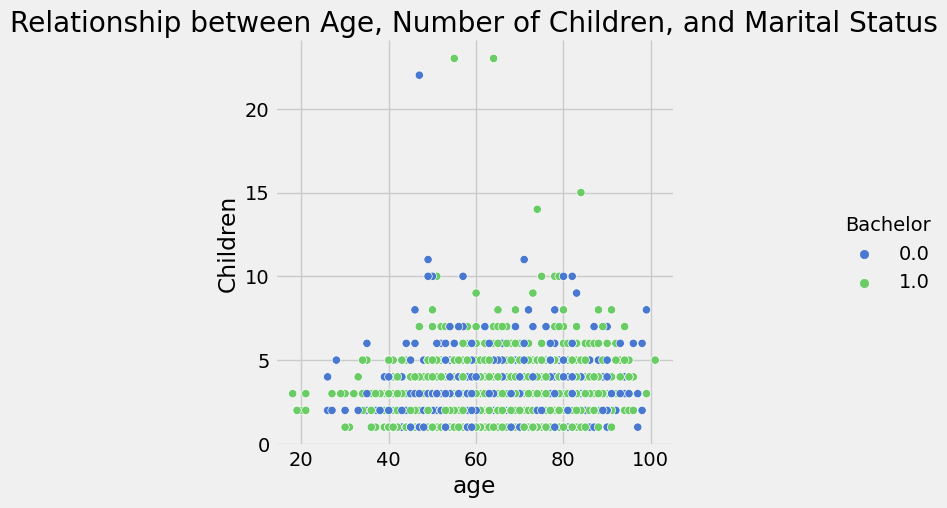

In [23]:
sns.relplot(x = 'age',y = 'Children',data = forbe, hue = 'Bachelor')
plt.title('Relationship between Age, Number of Children, and Marital Status')
plt.show()

# Line Plot

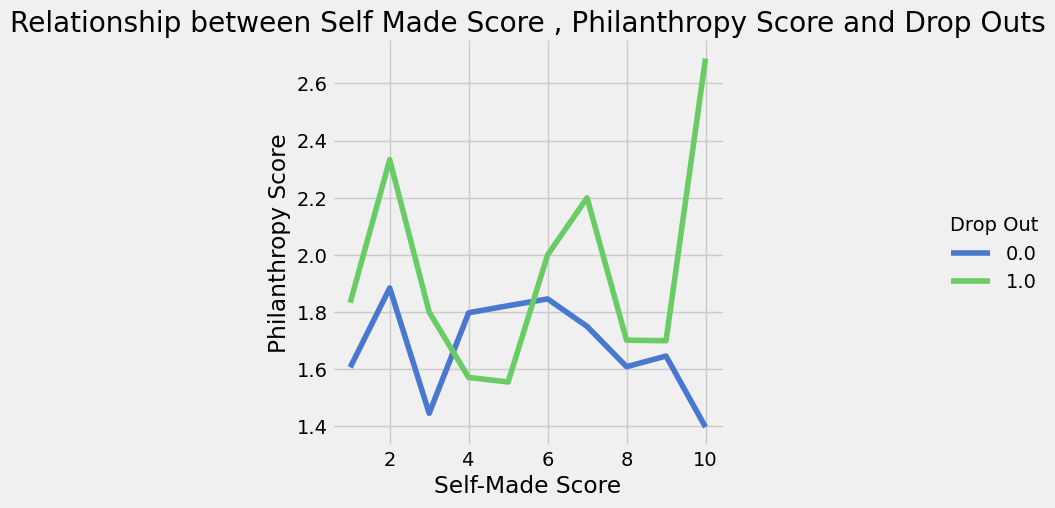

In [24]:
sns.relplot(x = 'Self-Made Score', y = 'Philanthropy Score', data = forbe, kind = 'line', hue = 'Drop Out', errorbar = None)
plt.title('Relationship between Self Made Score , Philanthropy Score and Drop Outs')
plt.show()

In [25]:
forbe['Marital Status'].unique()

array(['Single', 'Engaged', 'In Relationship', 'Widowed, Remarried',
       'Divorced', 'Widowed', 'Married', 'Separated'], dtype=object)

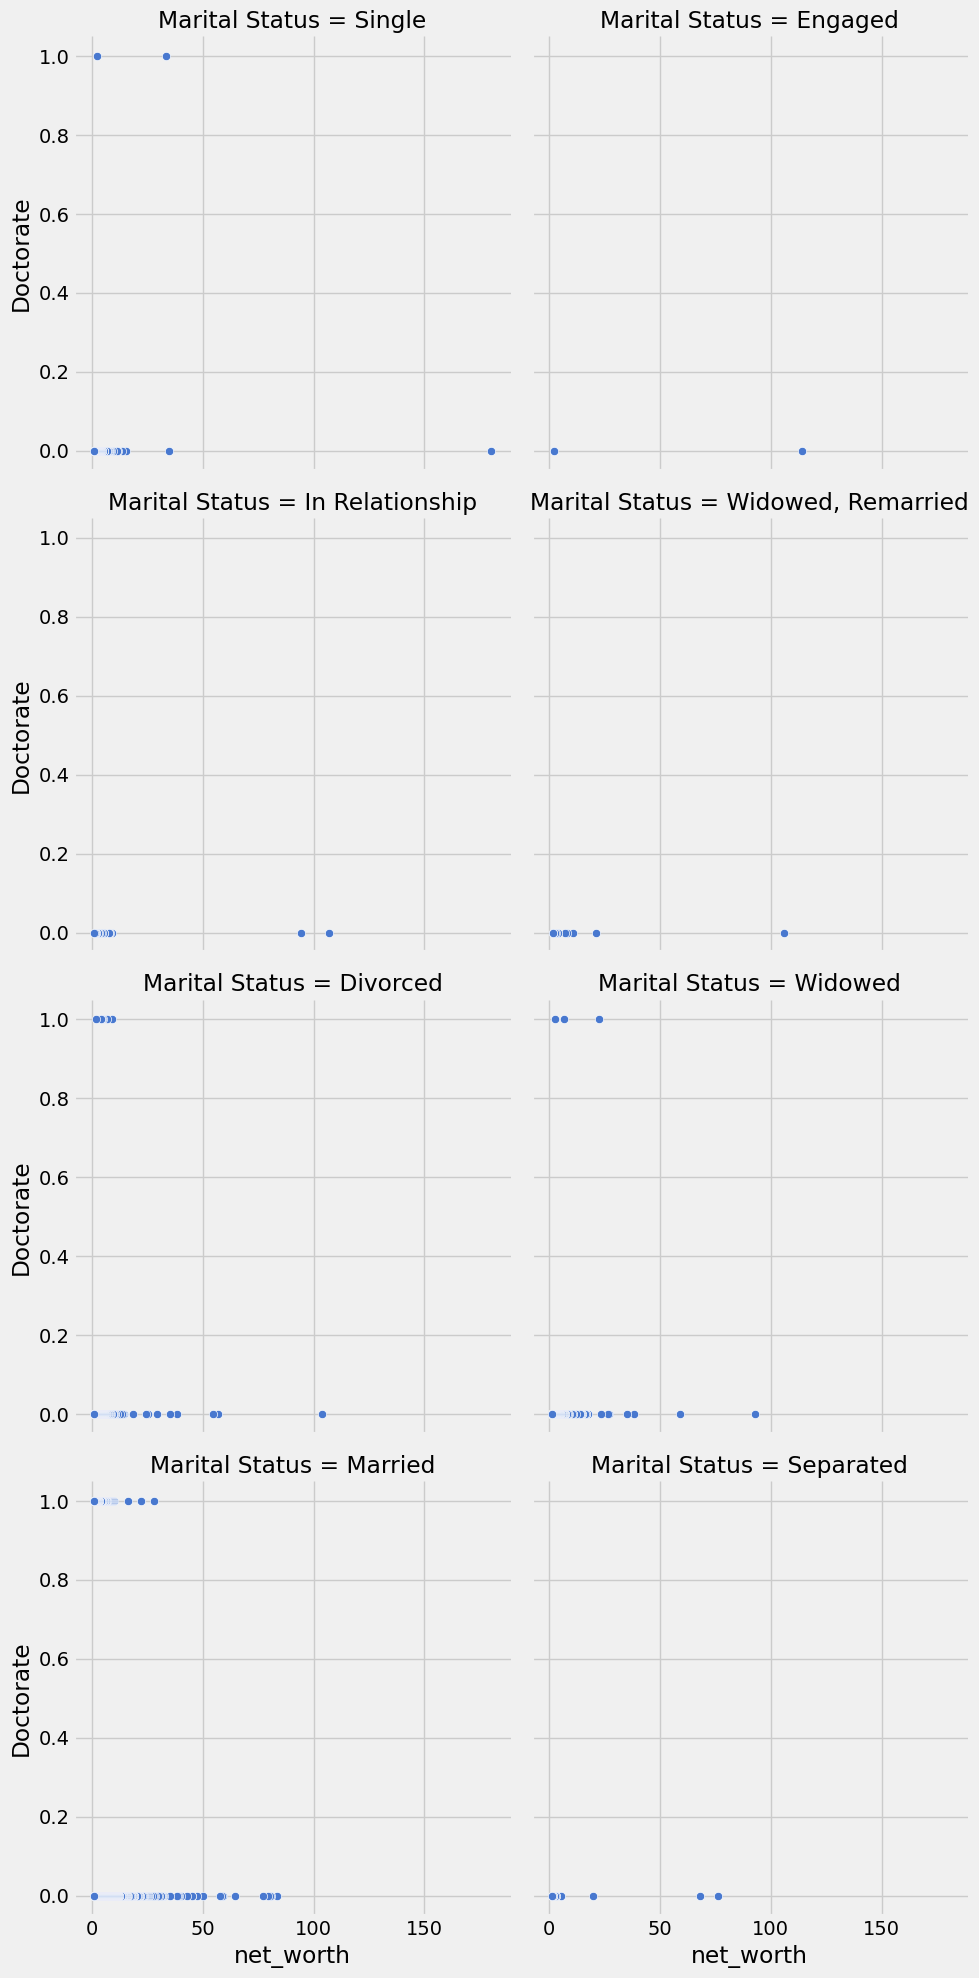

In [26]:
sns.relplot(x = 'net_worth',y = 'Doctorate', data = forbe, col = 'Marital Status',col_wrap = 2)


# Relationship between Net Worth , Doctorate and Marital Status


# Scatter chart for categorical data

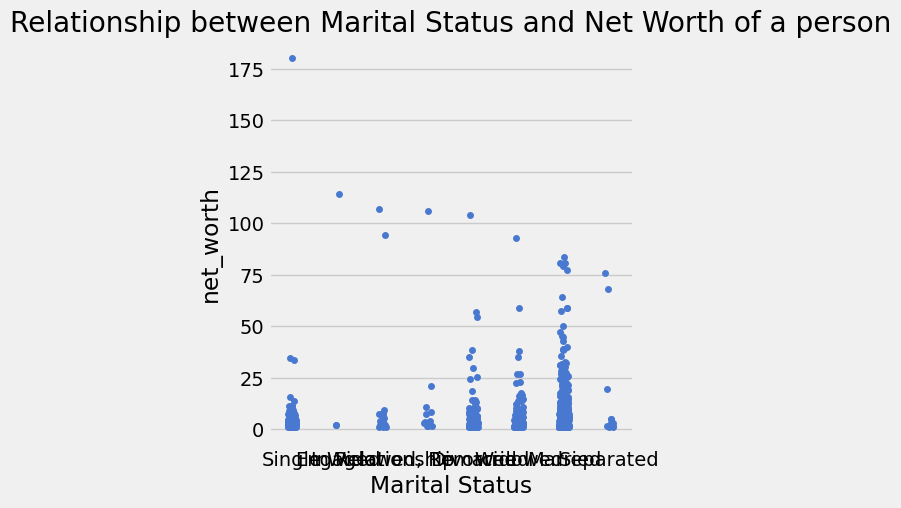

In [27]:
sns.catplot(x = 'Marital Status', y = 'net_worth', data = forbe)
plt.title('Relationship between Marital Status and Net Worth of a person')
plt.show()

<Figure size 2000x1000 with 0 Axes>

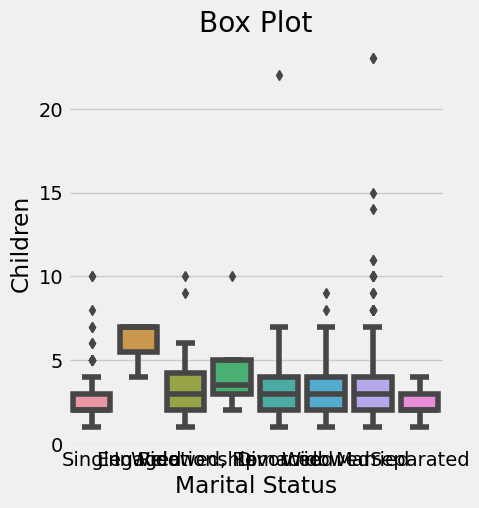

In [28]:
plt.figure(figsize=(20,10))
sns.catplot(x = 'Marital Status', y = 'Children', data = forbe , kind = 'box' )
plt.title("Box Plot")
plt.show()

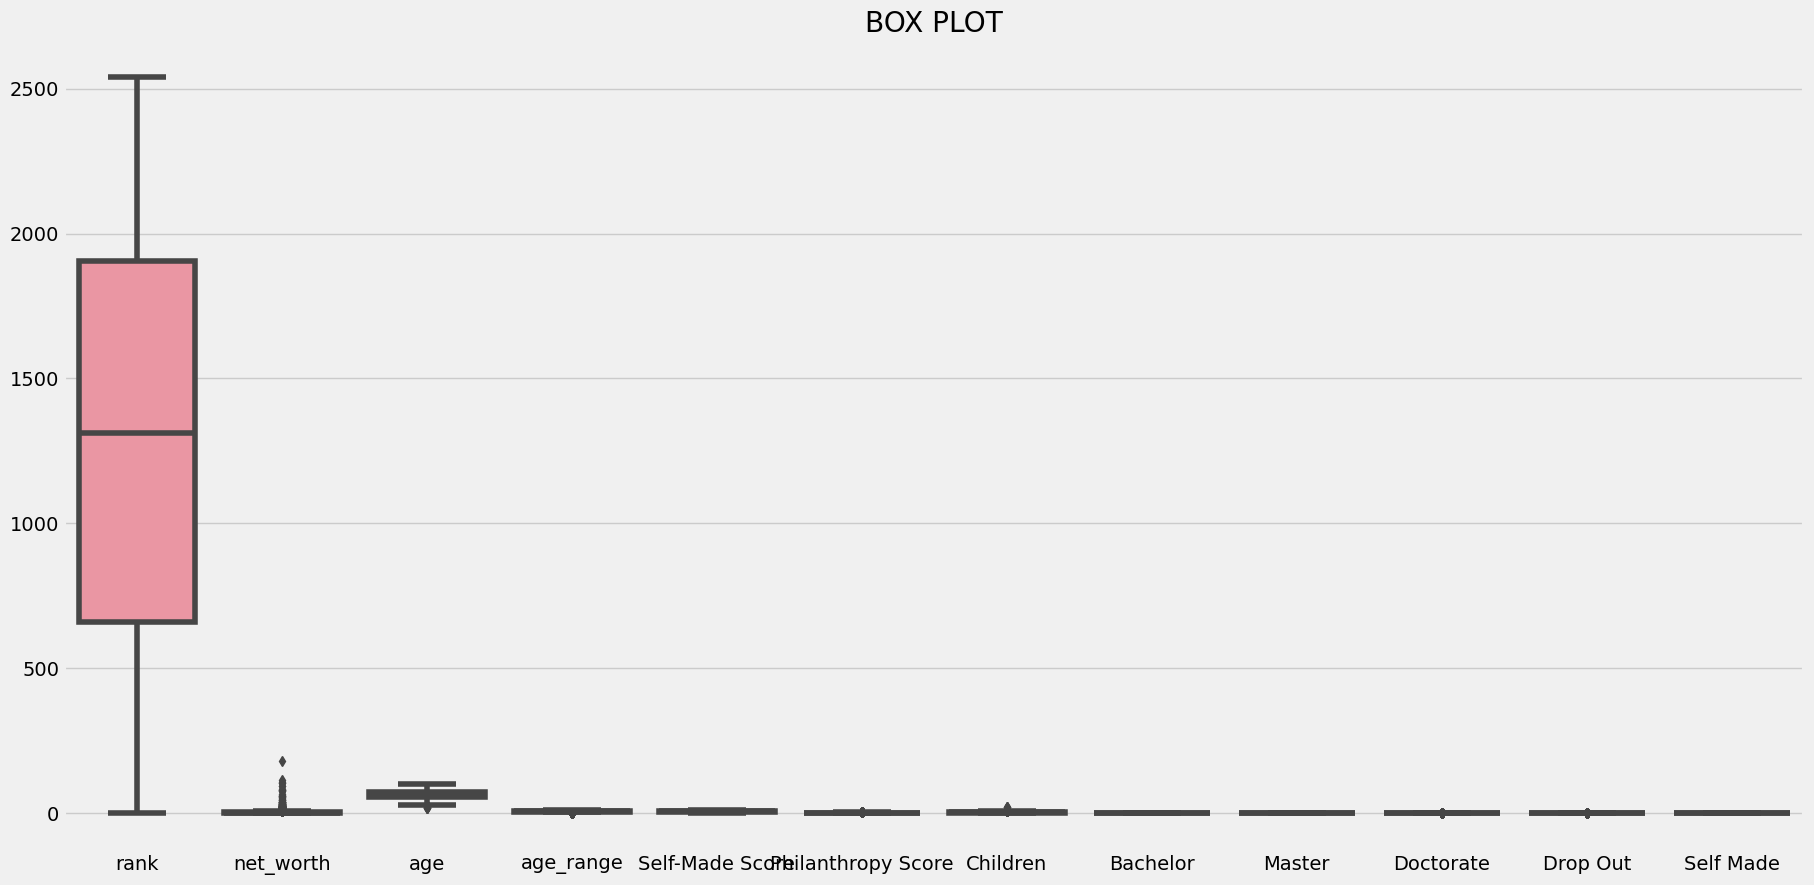

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(forbe)
plt.title('BOX PLOT')
plt.show()

<Figure size 2000x1000 with 0 Axes>

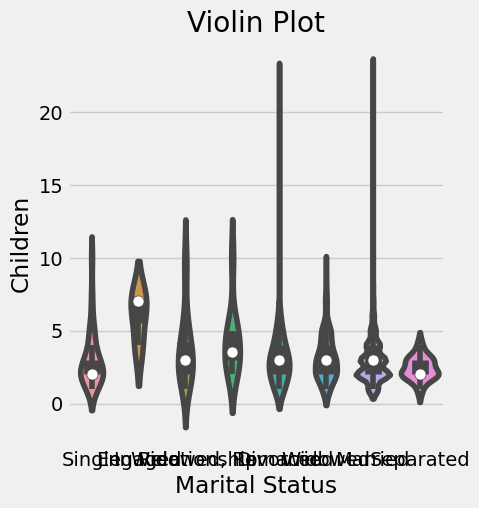

In [30]:
plt.figure(figsize=(20,10))
sns.catplot(x = 'Marital Status', y = 'Children', data = forbe , kind = 'violin' )
plt.title("Violin Plot")
plt.show()

# Bar Chart

<Figure size 10000x9000 with 0 Axes>

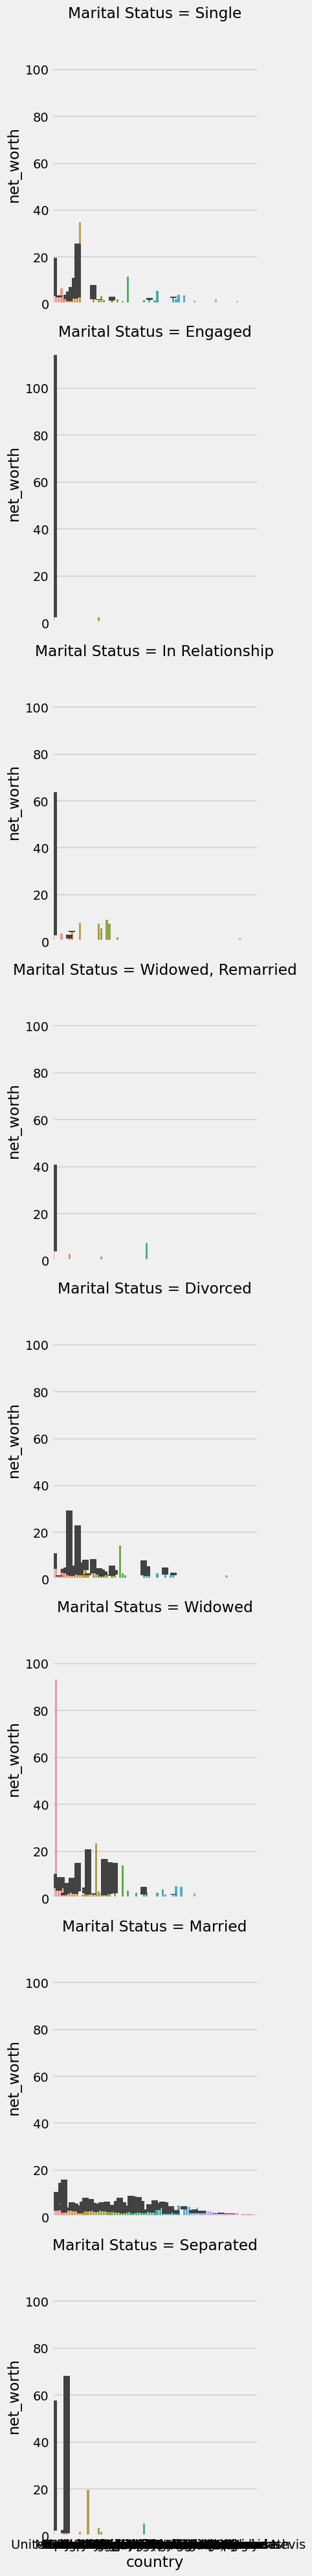

In [31]:
plt.figure(figsize=(100,90))
sns.catplot(x = 'country', y = 'net_worth',col = 'Marital Status', data = forbe, kind = 'bar',col_wrap = 1)

<Figure size 1000x2000 with 0 Axes>

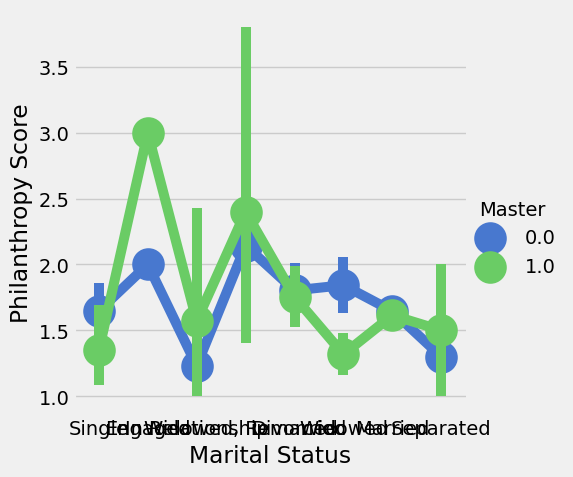

In [32]:
plt.figure(figsize=(10,20))
sns.catplot(x = 'Marital Status', y = 'Philanthropy Score', data = forbe, hue = 'Master' , kind = 'point')

/var/folders/k4/94dydth92nd8yphq0c315th40000gp/T/ipykernel_9765/182232328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forbe['Self-Made Score'])


<Axes: xlabel='Self-Made Score', ylabel='Density'>

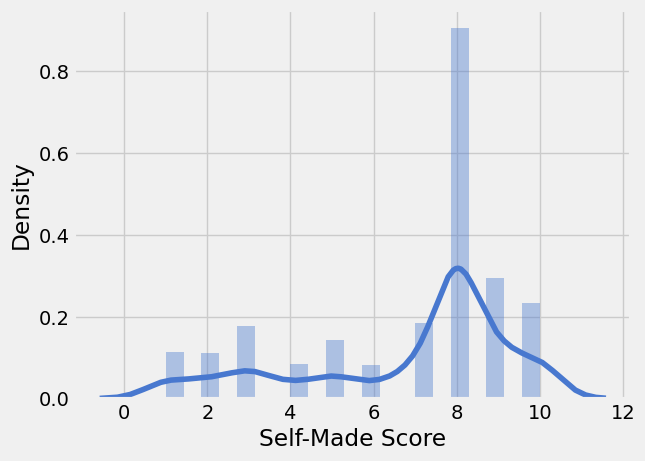

In [33]:
sns.distplot(forbe['Self-Made Score'])

/var/folders/k4/94dydth92nd8yphq0c315th40000gp/T/ipykernel_9765/1063962111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forbe['Drop Out'], kde = False)


<Axes: xlabel='Drop Out'>

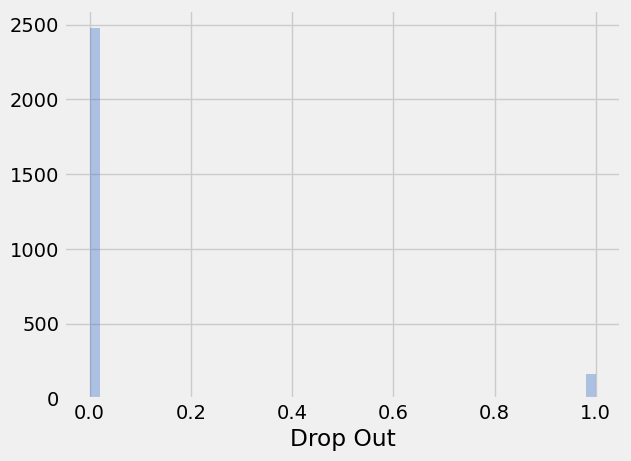

In [34]:
sns.distplot(forbe['Drop Out'], kde = False)

/var/folders/k4/94dydth92nd8yphq0c315th40000gp/T/ipykernel_9765/858646324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forbe['Self Made'], hist = False)


<Axes: xlabel='Self Made', ylabel='Density'>

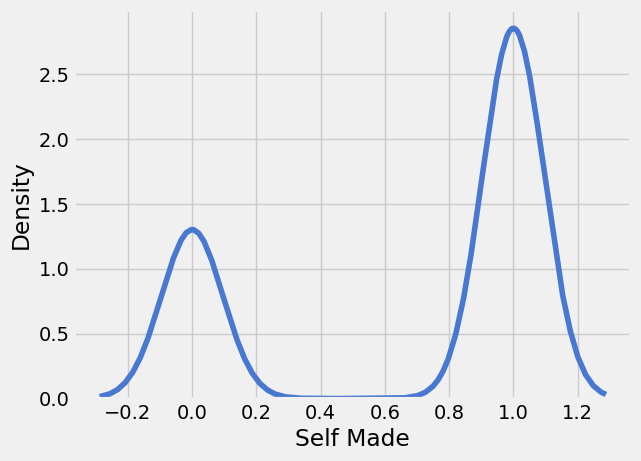

In [35]:
sns.distplot(forbe['Self Made'], hist = False)

# Joint Plot and Pair Plot

<Figure size 250000x150000 with 0 Axes>

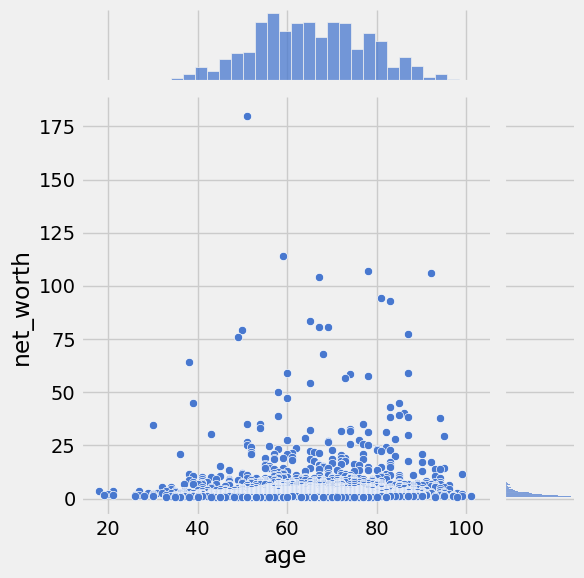

In [36]:
plt.figure(figsize=(2500,1500))
sns.jointplot(x = 'age', y = 'net_worth', data = forbe)
plt.show()

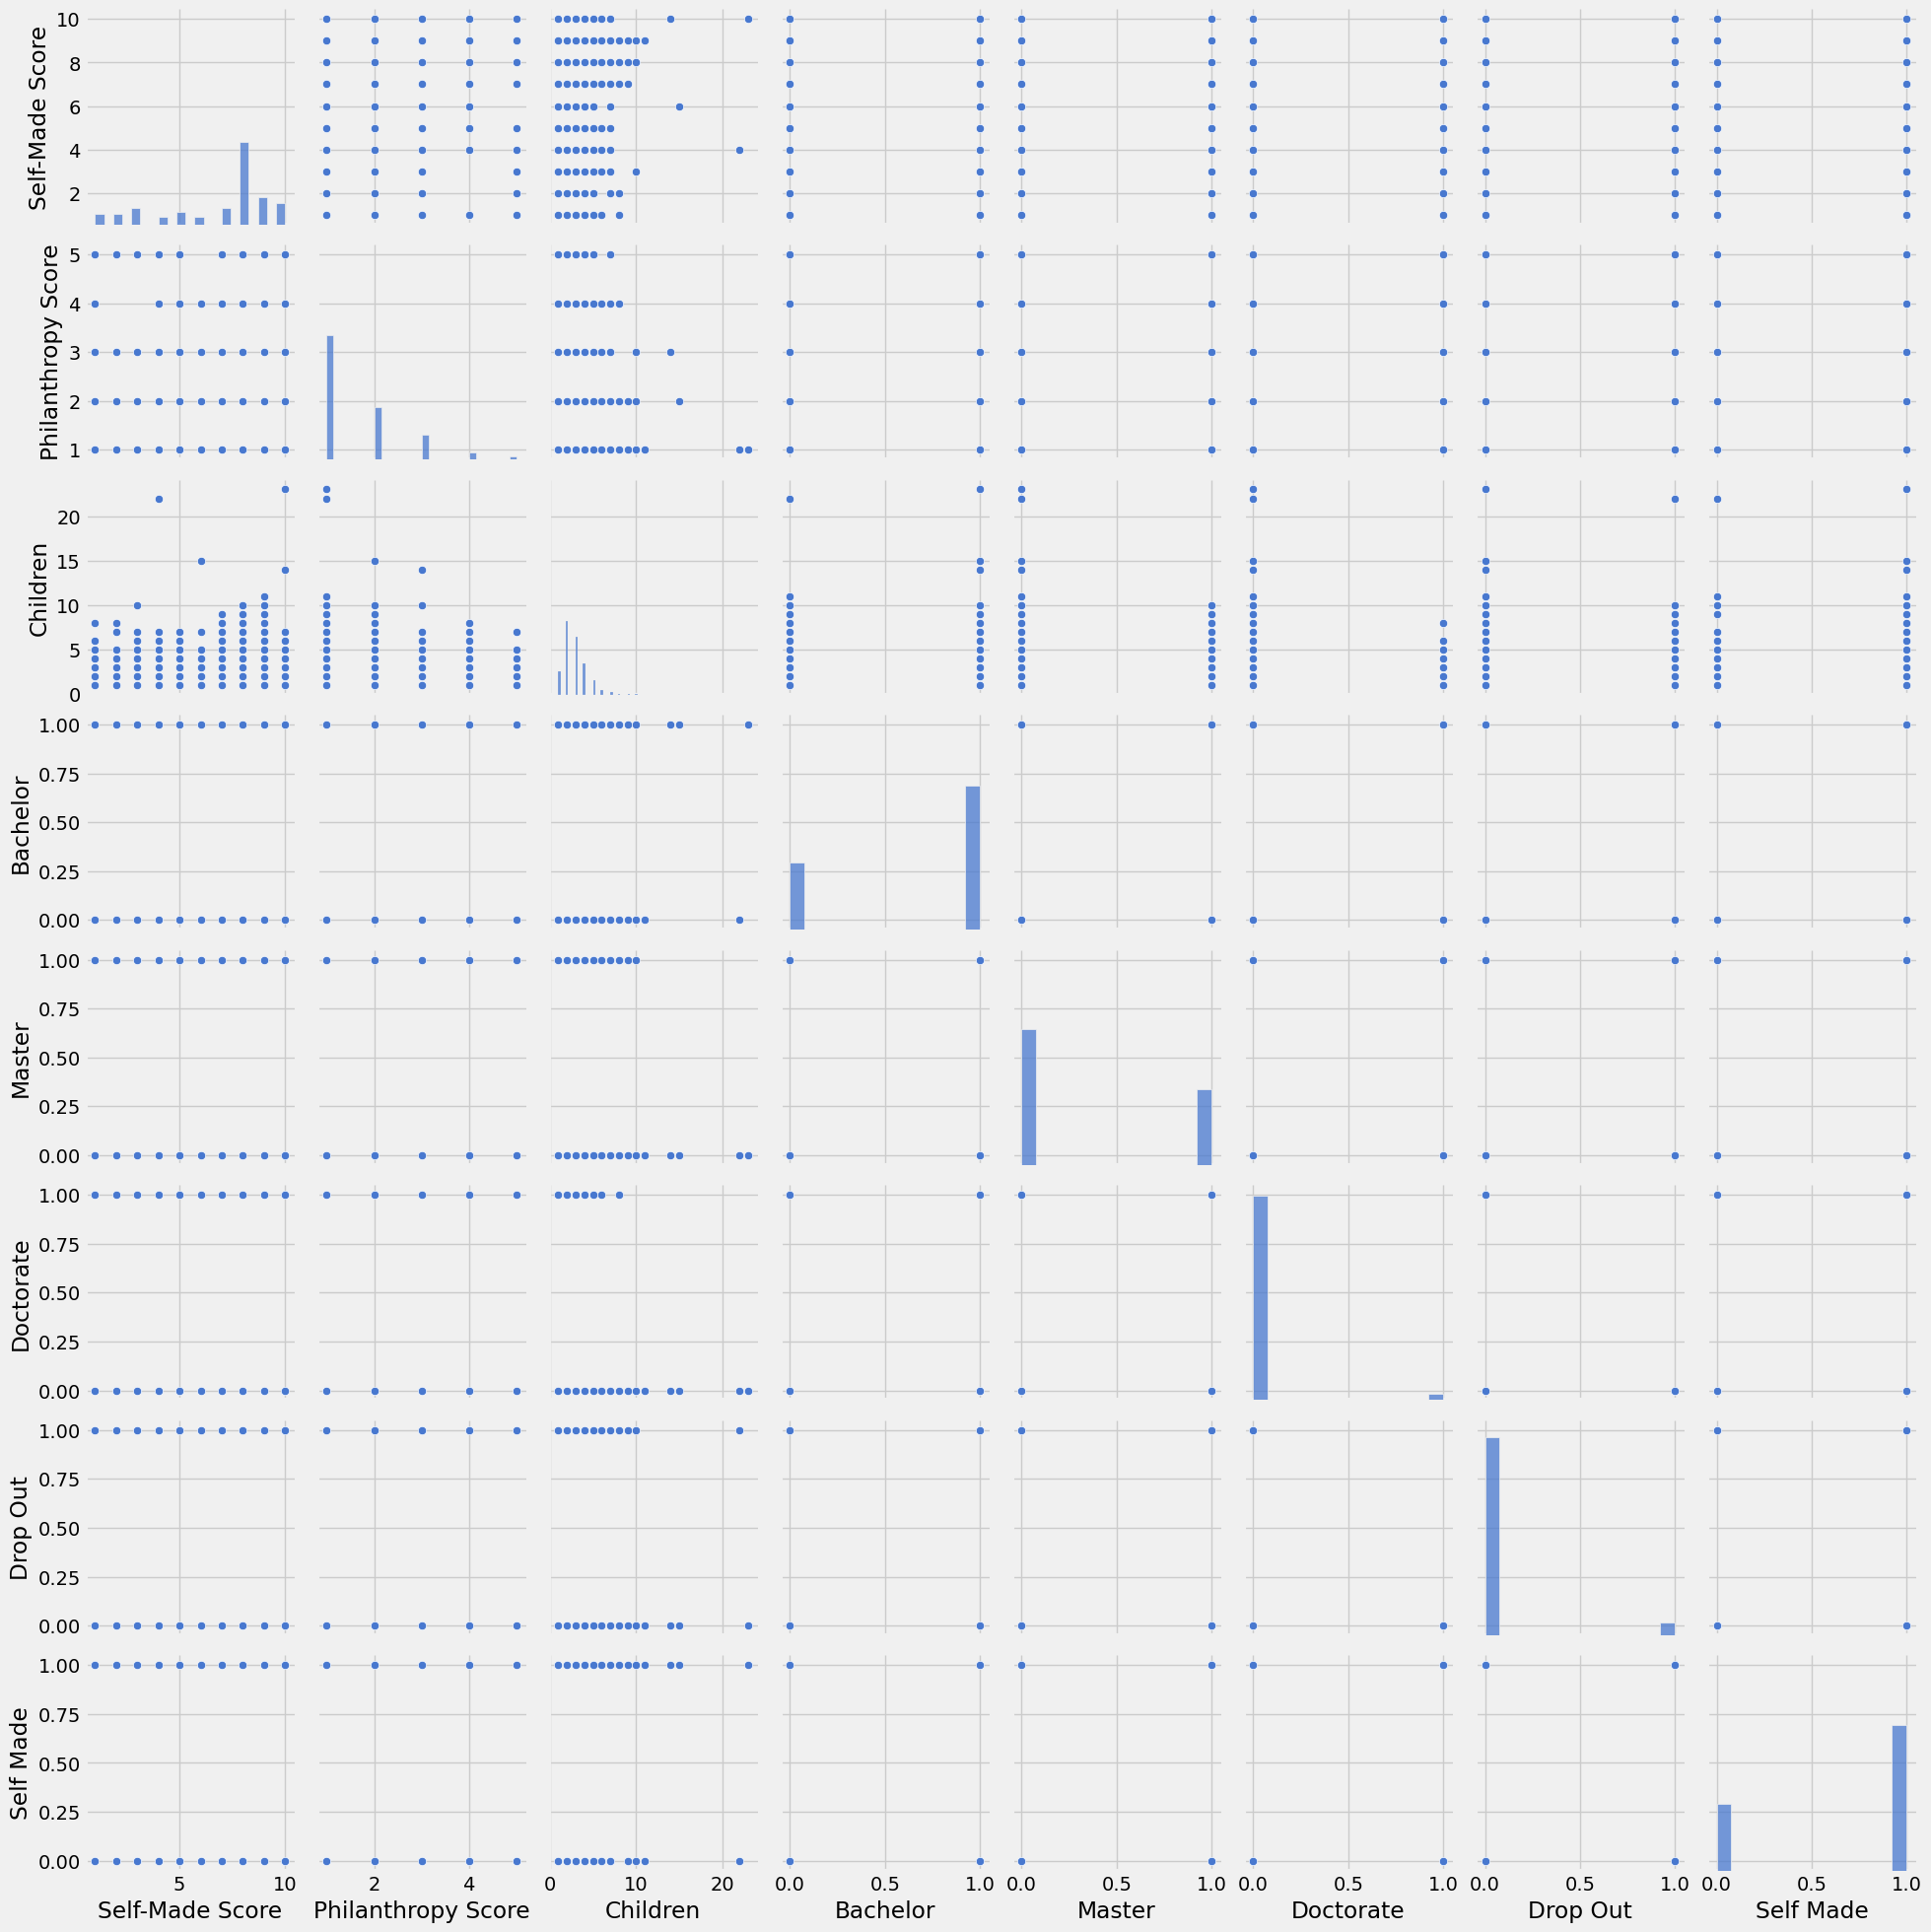

In [37]:
sns.pairplot(forbe[['Self-Made Score',
       'Philanthropy Score','Children', 'Education', 'Bachelor', 'Master', 'Doctorate', 'Drop Out',
       'Self Made']])

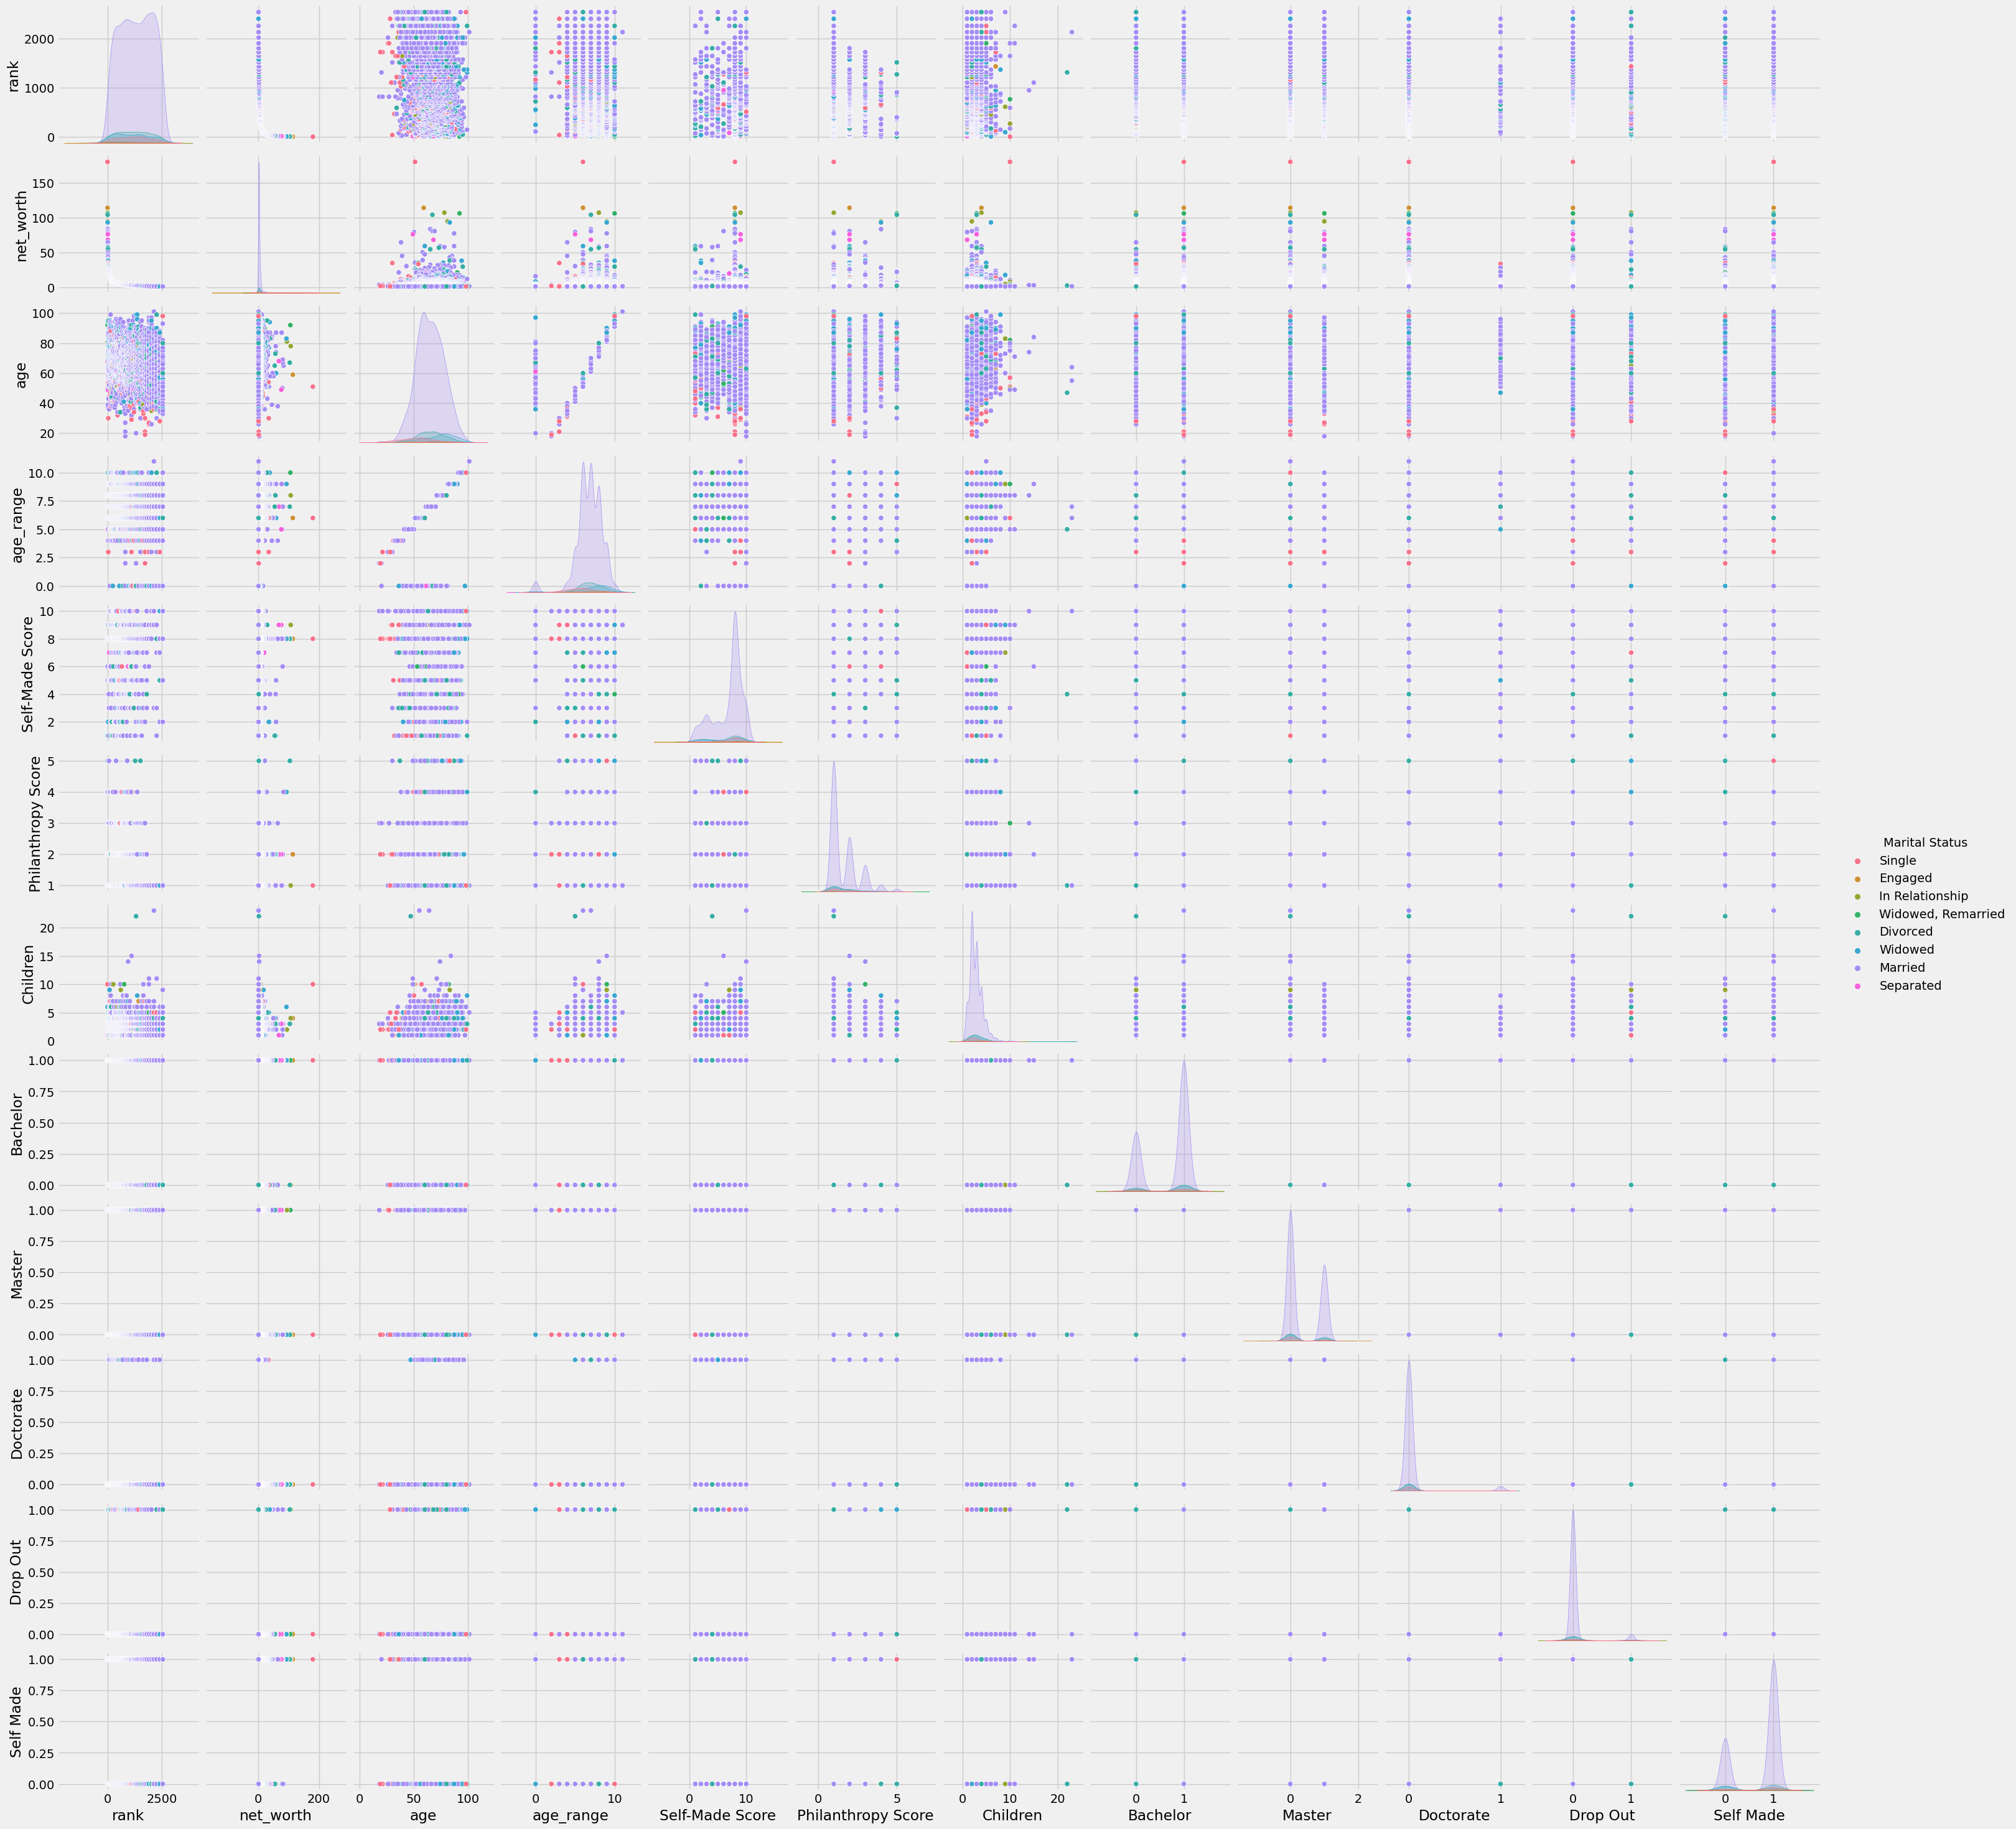

In [38]:
sns.pairplot(forbe, hue = 'Marital Status')

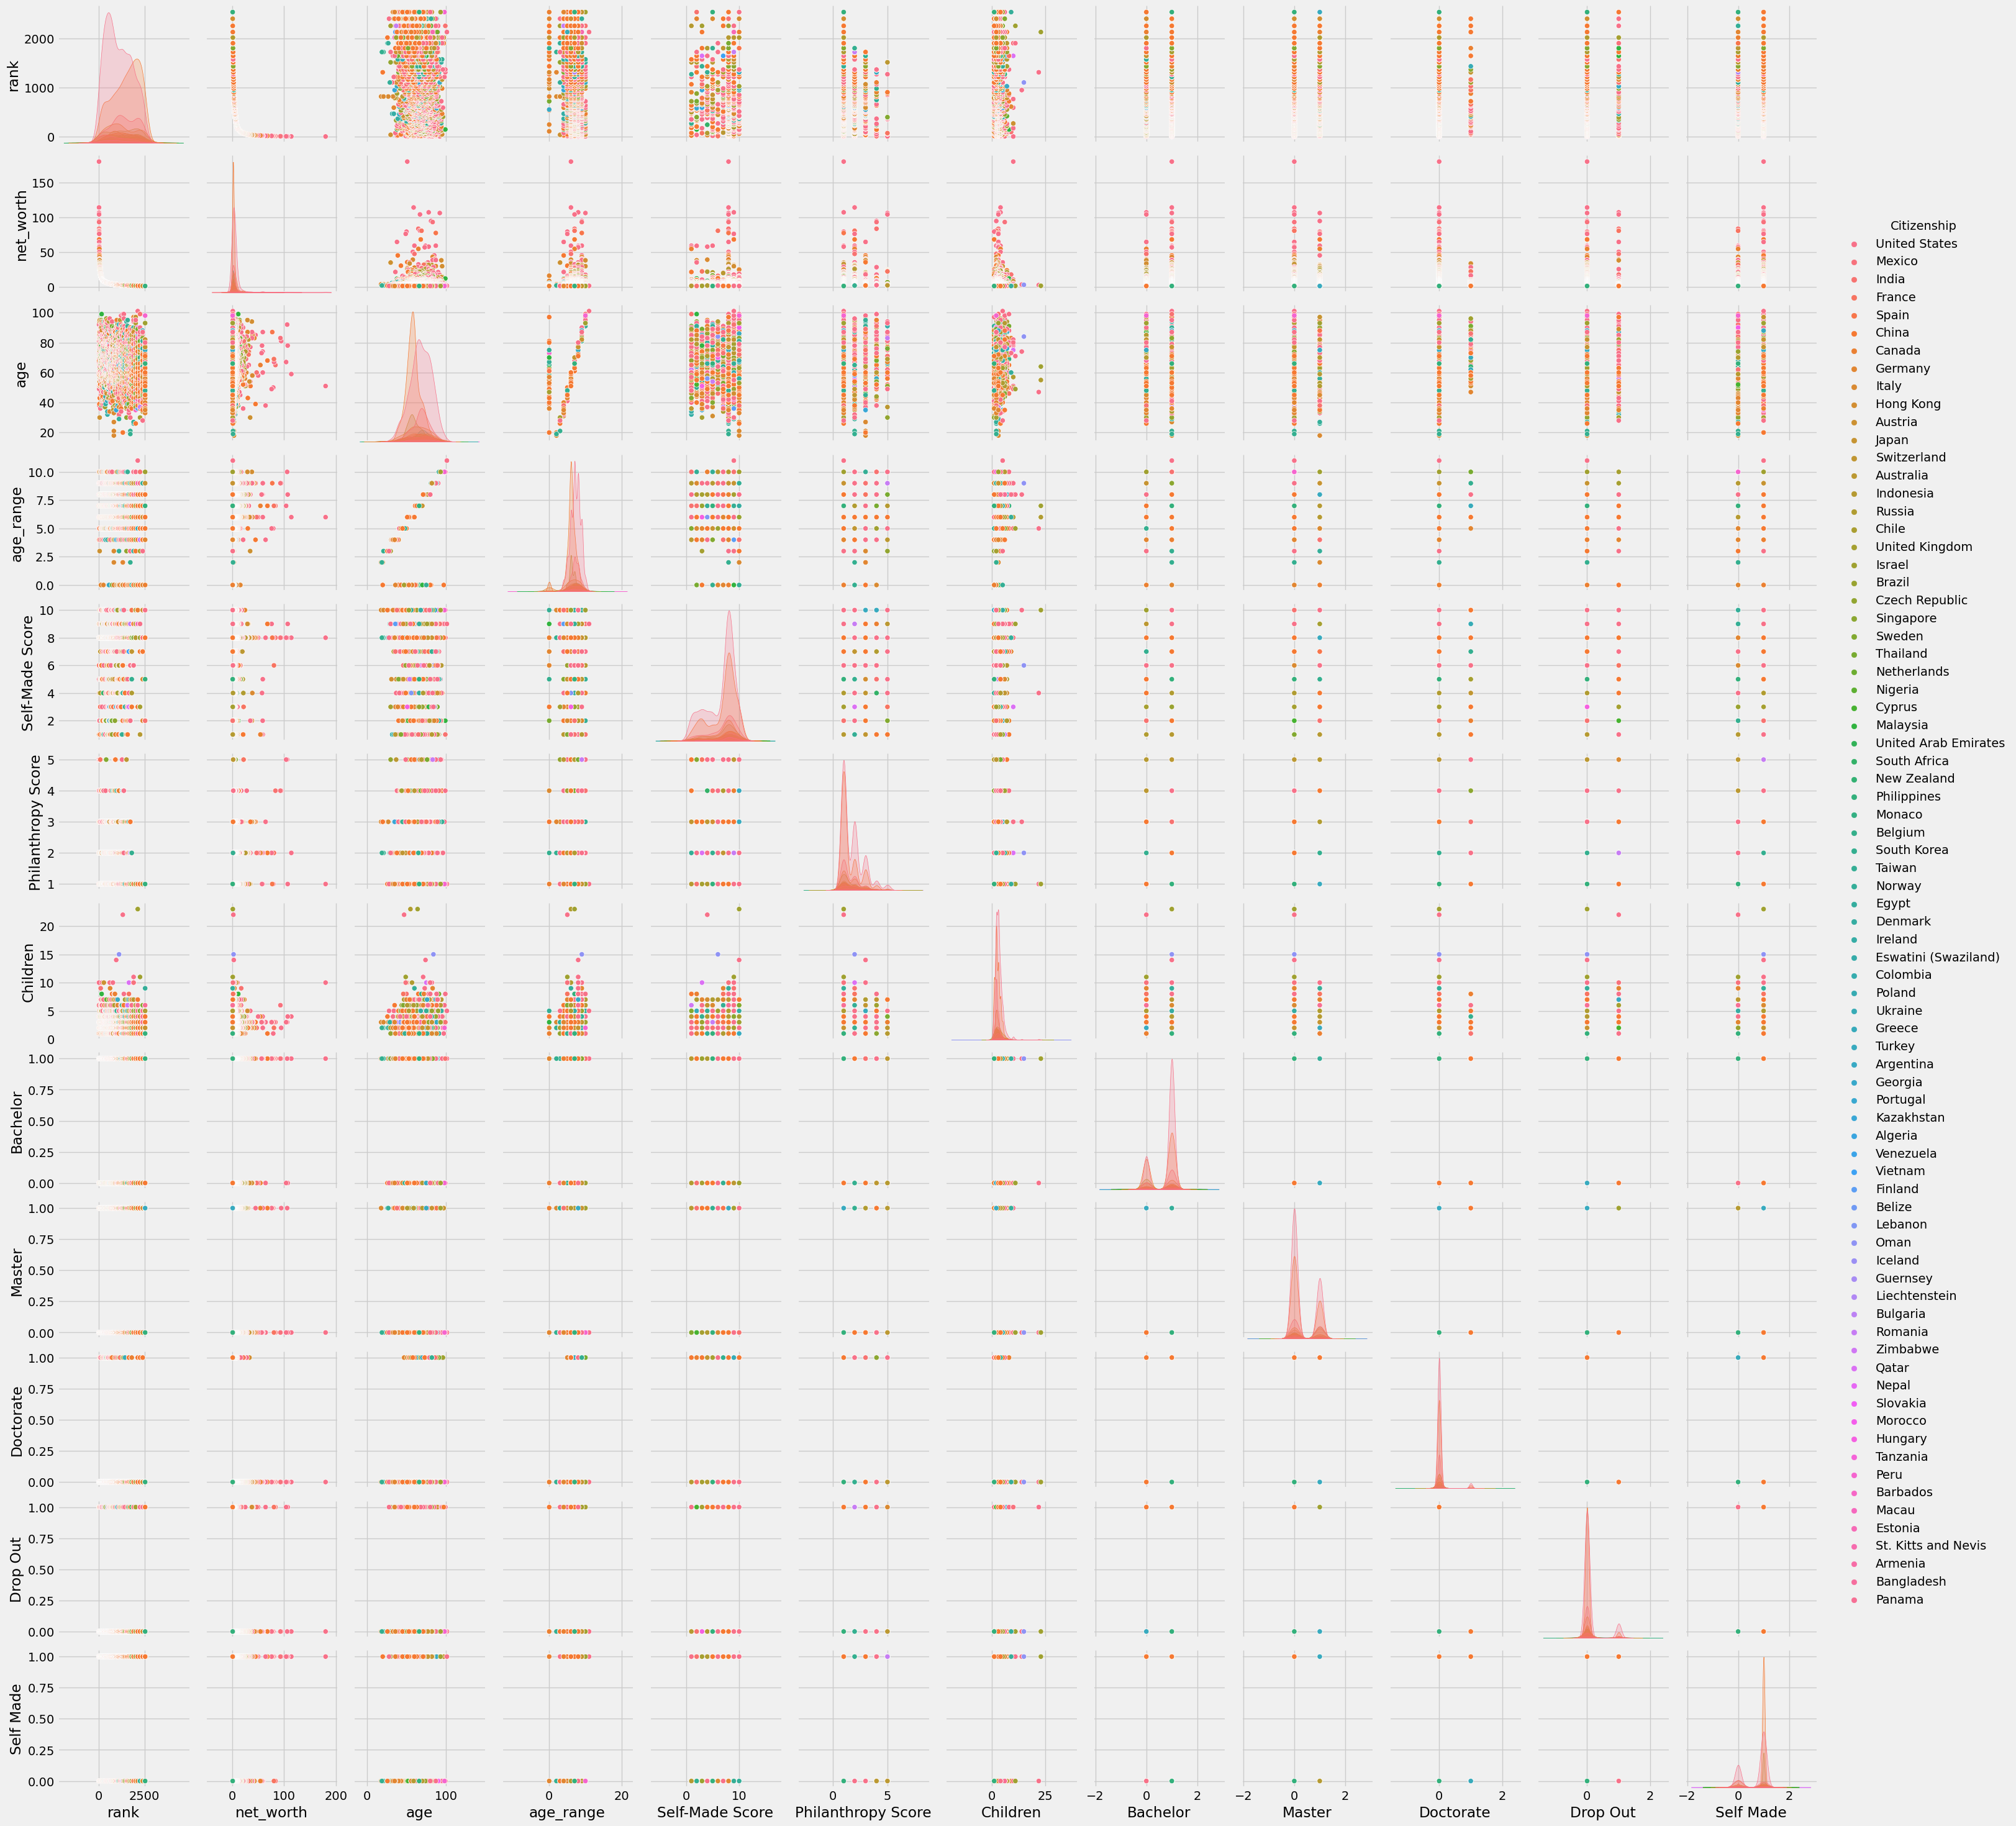

In [39]:
sns.pairplot(forbe, hue = 'Citizenship')